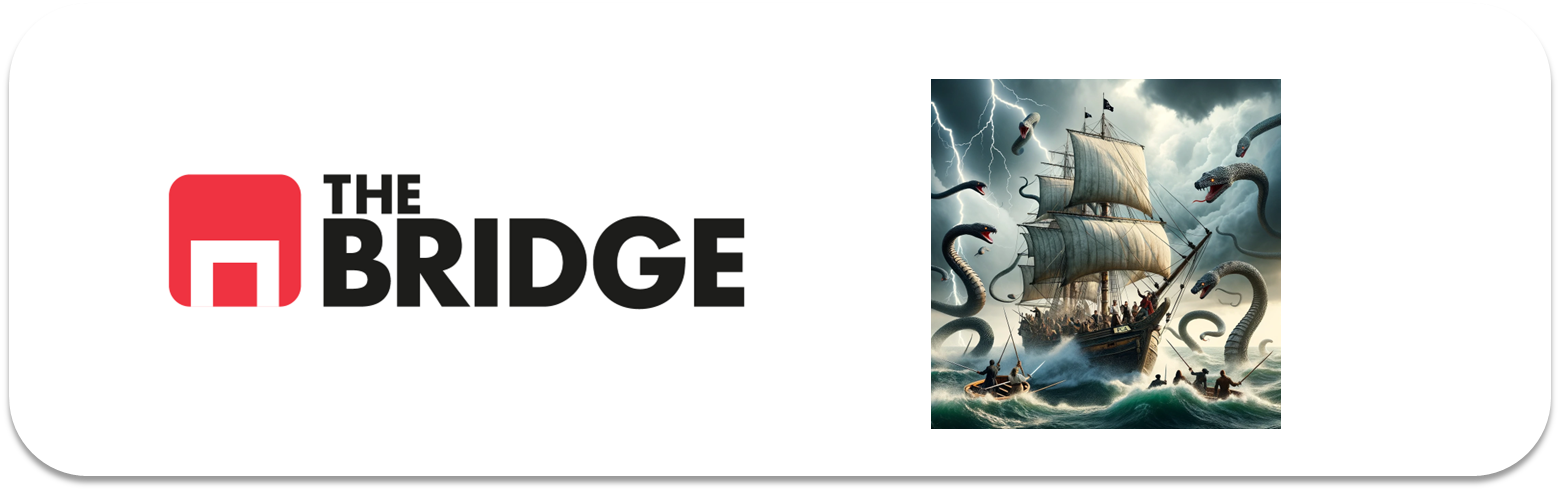

## PRACTICA OBLIGATORIA: **Seleccion Features**

* La práctica obligatoria de esta unidad consiste en hacer una comparativa de diferentes técnicas de selección de features sobre un dataset ya conocido. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Descripción General y Objetivo

El objetivo de la práctica es que juegues con las diferentes técncias de selección de features sobre un problema de clasificación. Para ello, tendrás que cargar el dataset de credit scoring que tienes en la carpeta "data" y que ya hemos trabajado anteriormente. A partir de ahí tendrás que probar diferentes técnicas de selección de features y compararlas todas entre sí y escoger finalmente el conjunto más sencillo con más potencia. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [146]:
import bootcampviztools as bt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold


#import warnings library
import warnings
# ignore all warnings
warnings.filterwarnings('ignore')

### Detalles e Instrucciones

El objetivo es que construyas un modelo final de clasificació sobre la variable "SeriousDlqin2yrs" del dataset que encontrarás en "data".  

Sigue los pasos del proceso de ML que hemos aprendido para problemas supervisados con el dataset que encontrarás en "data" pero con las siguiente salvedades:

1. Deshazte de las filas con nulos, para este ejercicio no nos importan. Convierte las features NumberOf... que creas conveniente a categóricas con 2 o 3 niveles a lo sumo.

2. A la hora de hacer el miniEda aplica los siguientes análisis y selección de features: 
    1. Análisis visual combinado con filtrado por valores de correlación y umbral de covarianza.
    2. Selección de features numéricas mediante SelectKBest y ANOVA, selecció de features categóricas mediante Mutual Information 
    3. Selección de las mejores features a través de un modelo intermedio (usando SelectFromModel)
    4. Selección de las mejores features empleando RFE.
    5. Selección de las mejores features empleando SFS.
    6. Selección de las mejores features mediante un sistema de hard-voting aplicado a lo obtenido en los pasos 1 a 5 anteriores.

    Para cada paso anterior (salvo el 1) se pide obtener una lista de features de "primera división" con un número de variables no superior a 6 (pueden ser menos).

3. Escoge tres modelos y a la hora compararlos para escoger el mejor, entrenalos con validación cruzada empleando las seis listas obtenidas anteriormente. Es decir tendrás 18 (6*3) medidas (emplea la métrica que creas más conveniente y si no se te ocurre ninguna el recall medio).  Escoge el mejor modelo y la mejor selección de features.

4. Optimiza los hiperparámetros del mejor modelo. Evalúalo contra test.


1. Deshazte de las filas con nulos, para este ejercicio no nos importan. Convierte las features NumberOf... que creas conveniente a categóricas con 2 o 3 niveles a lo sumo.

In [147]:
df = pd.read_csv("./data/credit_npo.csv")
df = df.dropna()


In [148]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,11816.000000,11816.000000,11816.000000,11816.000000,11816.000000,11816.000000,11816.000000,11816.000000,11816.000000,11816.000000,11816.000000
mean,0.070244,0.335668,51.447698,0.340471,0.499708,6864.815420,8.759140,0.180010,1.059580,0.149712,0.856804
std,0.255568,0.365209,14.516270,2.927409,2.696067,11855.905437,5.129772,2.892577,1.140716,2.868248,1.147509
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.034927,41.000000,0.000000,0.143456,3498.750000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.179183,51.000000,0.000000,0.294748,5416.000000,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.587187,62.000000,0.000000,0.477414,8300.000000,11.000000,0.000000,2.000000,0.000000,2.000000
max,1.000000,6.000000,101.000000,98.000000,96.000000,702500.000000,49.000000,98.000000,19.000000,98.000000,10.000000


In [149]:
for col in df.columns:
    if "NumberOf" in col:
        print(col, ": ", df[col].unique())

NumberOfTime30-59DaysPastDueNotWorse :  [ 0  3  1  2  4 98  5  6  8  7]
NumberOfOpenCreditLinesAndLoans :  [12  9  2  4  3  5 11  8  7 13 10  1 14  6 16 15 19 18 17 22 20 23 29 24
 27  0 21 31 30 28 38 26 25 43 36 34 33 35 32 48 49 41 40]
NumberOfTimes90DaysLate :  [ 1  0  3  2 98  4  6  5  8  7 10  9 13]
NumberOfTime60-89DaysPastDueNotWorse :  [ 0  2  1  3 98  4  5 11]
NumberOfDependents :  [ 0.  2.  3.  1.  4.  5.  6.  8. 10.  7.]


In [150]:
for col in df.columns:
    if "NumberOf" in col:
        nombre = f"{col}_cat"
        df[nombre] = 1 #YES
        df.loc[df[col] == 0, nombre] = 0 #no
        df.drop(columns= [col], inplace=True)

In [151]:
#Cardinalidad funcion
def cardinalidad(df,categoria = 10, continua = 0.5):
    # Nuevo df con columnas, cardinalidades, % variación cardinalidad, tipo de dato y variables
    df_cardi = pd.DataFrame([df.columns, df.nunique(), df.nunique()/len(df) * 100, df.dtypes])
    df_cardi = df_cardi.T 
    df_cardi = df_cardi.rename(columns = {0:"Columnas" , 1:"Cardinalidad", 2: "Porcentaje_Cardi", 3: "Tipo_dato"}) 

    # Corrección para cuando solo tengo un valor
    df_cardi.loc[df_cardi["Cardinalidad"] == 1, "Porcentaje_Cardi"] = 0.00

    # Tipo de variables
    df_cardi["Variable"] = "Categorica"
    df_cardi.loc[df_cardi["Cardinalidad"] == 2, "Variable"] = "Binaria"
    df_cardi.loc[df_cardi["Cardinalidad"] >= categoria, "Variable"] = "Numerica discreta"
    df_cardi.loc[df_cardi["Porcentaje_Cardi"] >= continua, "Variable"] = "Numerica continua"

    return df_cardi

In [152]:
df_cardi = cardinalidad(df)
df_cardi

,Columnas,Cardinalidad,Porcentaje_Cardi,Tipo_dato,Variable
0,SeriousDlqin2yrs,2,0.016926,int64,Binaria
1,RevolvingUtilizationOfUnsecuredLines,10314,87.288422,float64,Numerica continua
2,age,78,0.660122,int64,Numerica continua
3,DebtRatio,11472,97.088693,float64,Numerica continua
4,MonthlyIncome,4167,35.265741,float64,Numerica continua
5,NumberRealEstateLoansOrLines,16,0.13541,int64,Numerica discreta
6,NumberOfTime30-59DaysPastDueNotWorse_cat,2,0.016926,int64,Binaria
7,NumberOfOpenCreditLinesAndLoans_cat,2,0.016926,int64,Binaria
8,NumberOfTimes90DaysLate_cat,2,0.016926,int64,Binaria
9,NumberOfTime60-89DaysPastDueNotWorse_cat,2,0.016926,int64,Binaria


In [153]:
categoricas = df_cardi.loc[df_cardi["Variable"] != "Numerica continua","Columnas"]
categoricas

0                             SeriousDlqin2yrs
5                 NumberRealEstateLoansOrLines
6     NumberOfTime30-59DaysPastDueNotWorse_cat
7          NumberOfOpenCreditLinesAndLoans_cat
8                  NumberOfTimes90DaysLate_cat
9     NumberOfTime60-89DaysPastDueNotWorse_cat
10                      NumberOfDependents_cat
Name: Columnas, dtype: object

In [154]:
numericas = df_cardi.loc[df_cardi["Variable"] == "Numerica continua"]["Columnas"]
numericas

1    RevolvingUtilizationOfUnsecuredLines
2                                     age
3                               DebtRatio
4                           MonthlyIncome
Name: Columnas, dtype: object

2. A la hora de hacer el miniEda aplica los siguientes análisis y selección de features: 
    1. Análisis visual combinado con filtrado por valores de correlación y umbral de covarianza.
    2. Selección de features numéricas mediante SelectKBest y ANOVA, selecció de features categóricas mediante Mutual Information 
    3. Selección de las mejores features a través de un modelo intermedio (usando SelectFromModel)
    4. Selección de las mejores features empleando RFE.
    5. Selección de las mejores features empleando SFS.
    6. Selección de las mejores features mediante un sistema de hard-voting aplicado a lo obtenido en los pasos 1 a 5 anteriores.

In [155]:
def mapa_calor_correlacion( df,porcentaje):
    # Supongamos que df_eu es tu DataFrame y ya has calculado la matriz de correlación
    matriz_correlacion = df.corr().abs()

    # Filtrar la matriz de correlación para dejar solo valores superiores a 0.5 o inferiores a -0.5
    filtro_correlacion = matriz_correlacion.applymap(lambda x: x if abs(x) > porcentaje else np.nan)

    # Crear el mapa de calor
    plt.figure(figsize=(10, 10))
    sns.heatmap(filtro_correlacion,
                square=True, 
                annot=True, 
                cmap='Blues', 
                center=0,
                cbar_kws={'shrink': .5},
                linewidths=.5,
                linecolor='lightblue')

    plt.title(f'Mapa de Calor de Correlaciones (|correlación| > {porcentaje})')
    return plt.show()


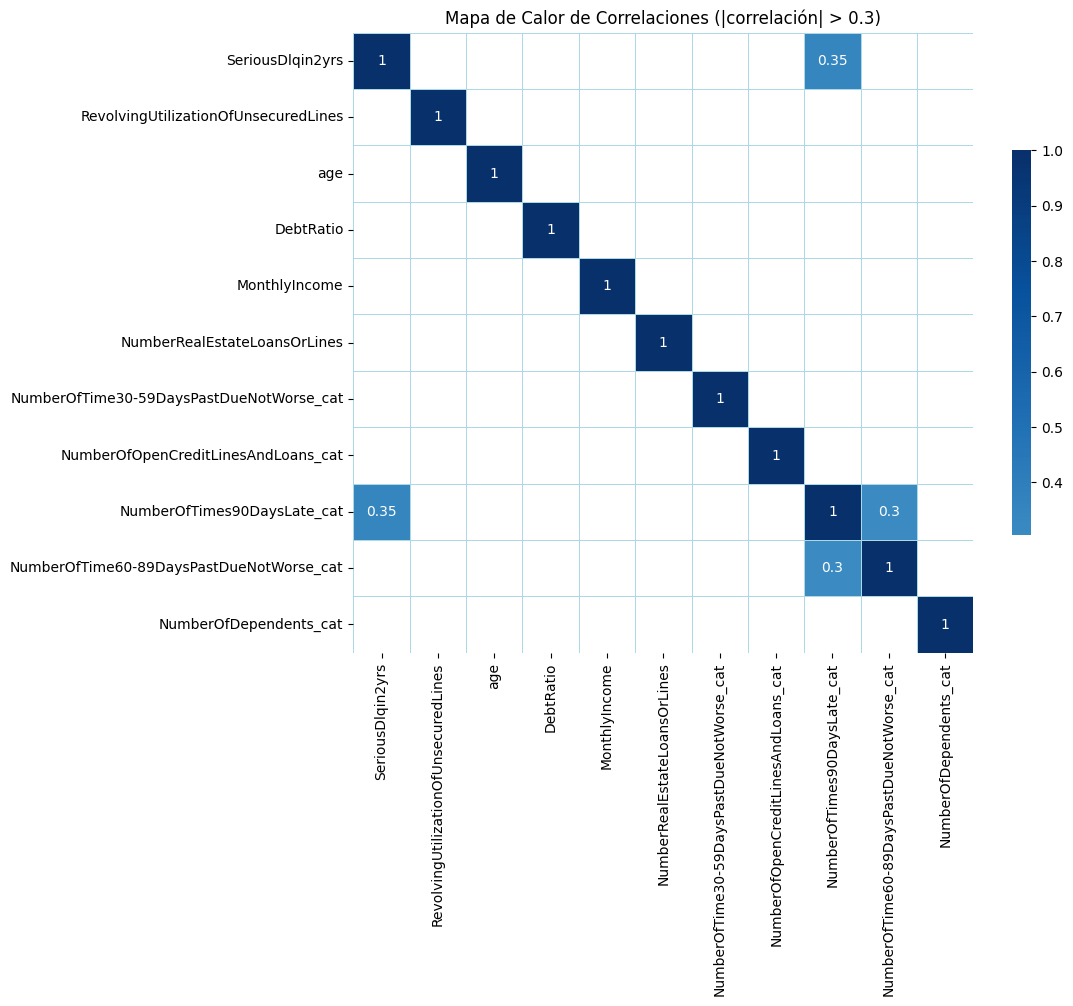

In [156]:
mapa_calor_correlacion(df,0.3)

In [157]:
umbral_varianza = 0.3

var_selector = VarianceThreshold(umbral_varianza)
var_selector.fit(df)

print("Lista seleccionada para selector de Varianza:\n", var_selector.get_feature_names_out())

Lista seleccionada para selector de Varianza:
 ['age' 'DebtRatio' 'MonthlyIncome' 'NumberRealEstateLoansOrLines']


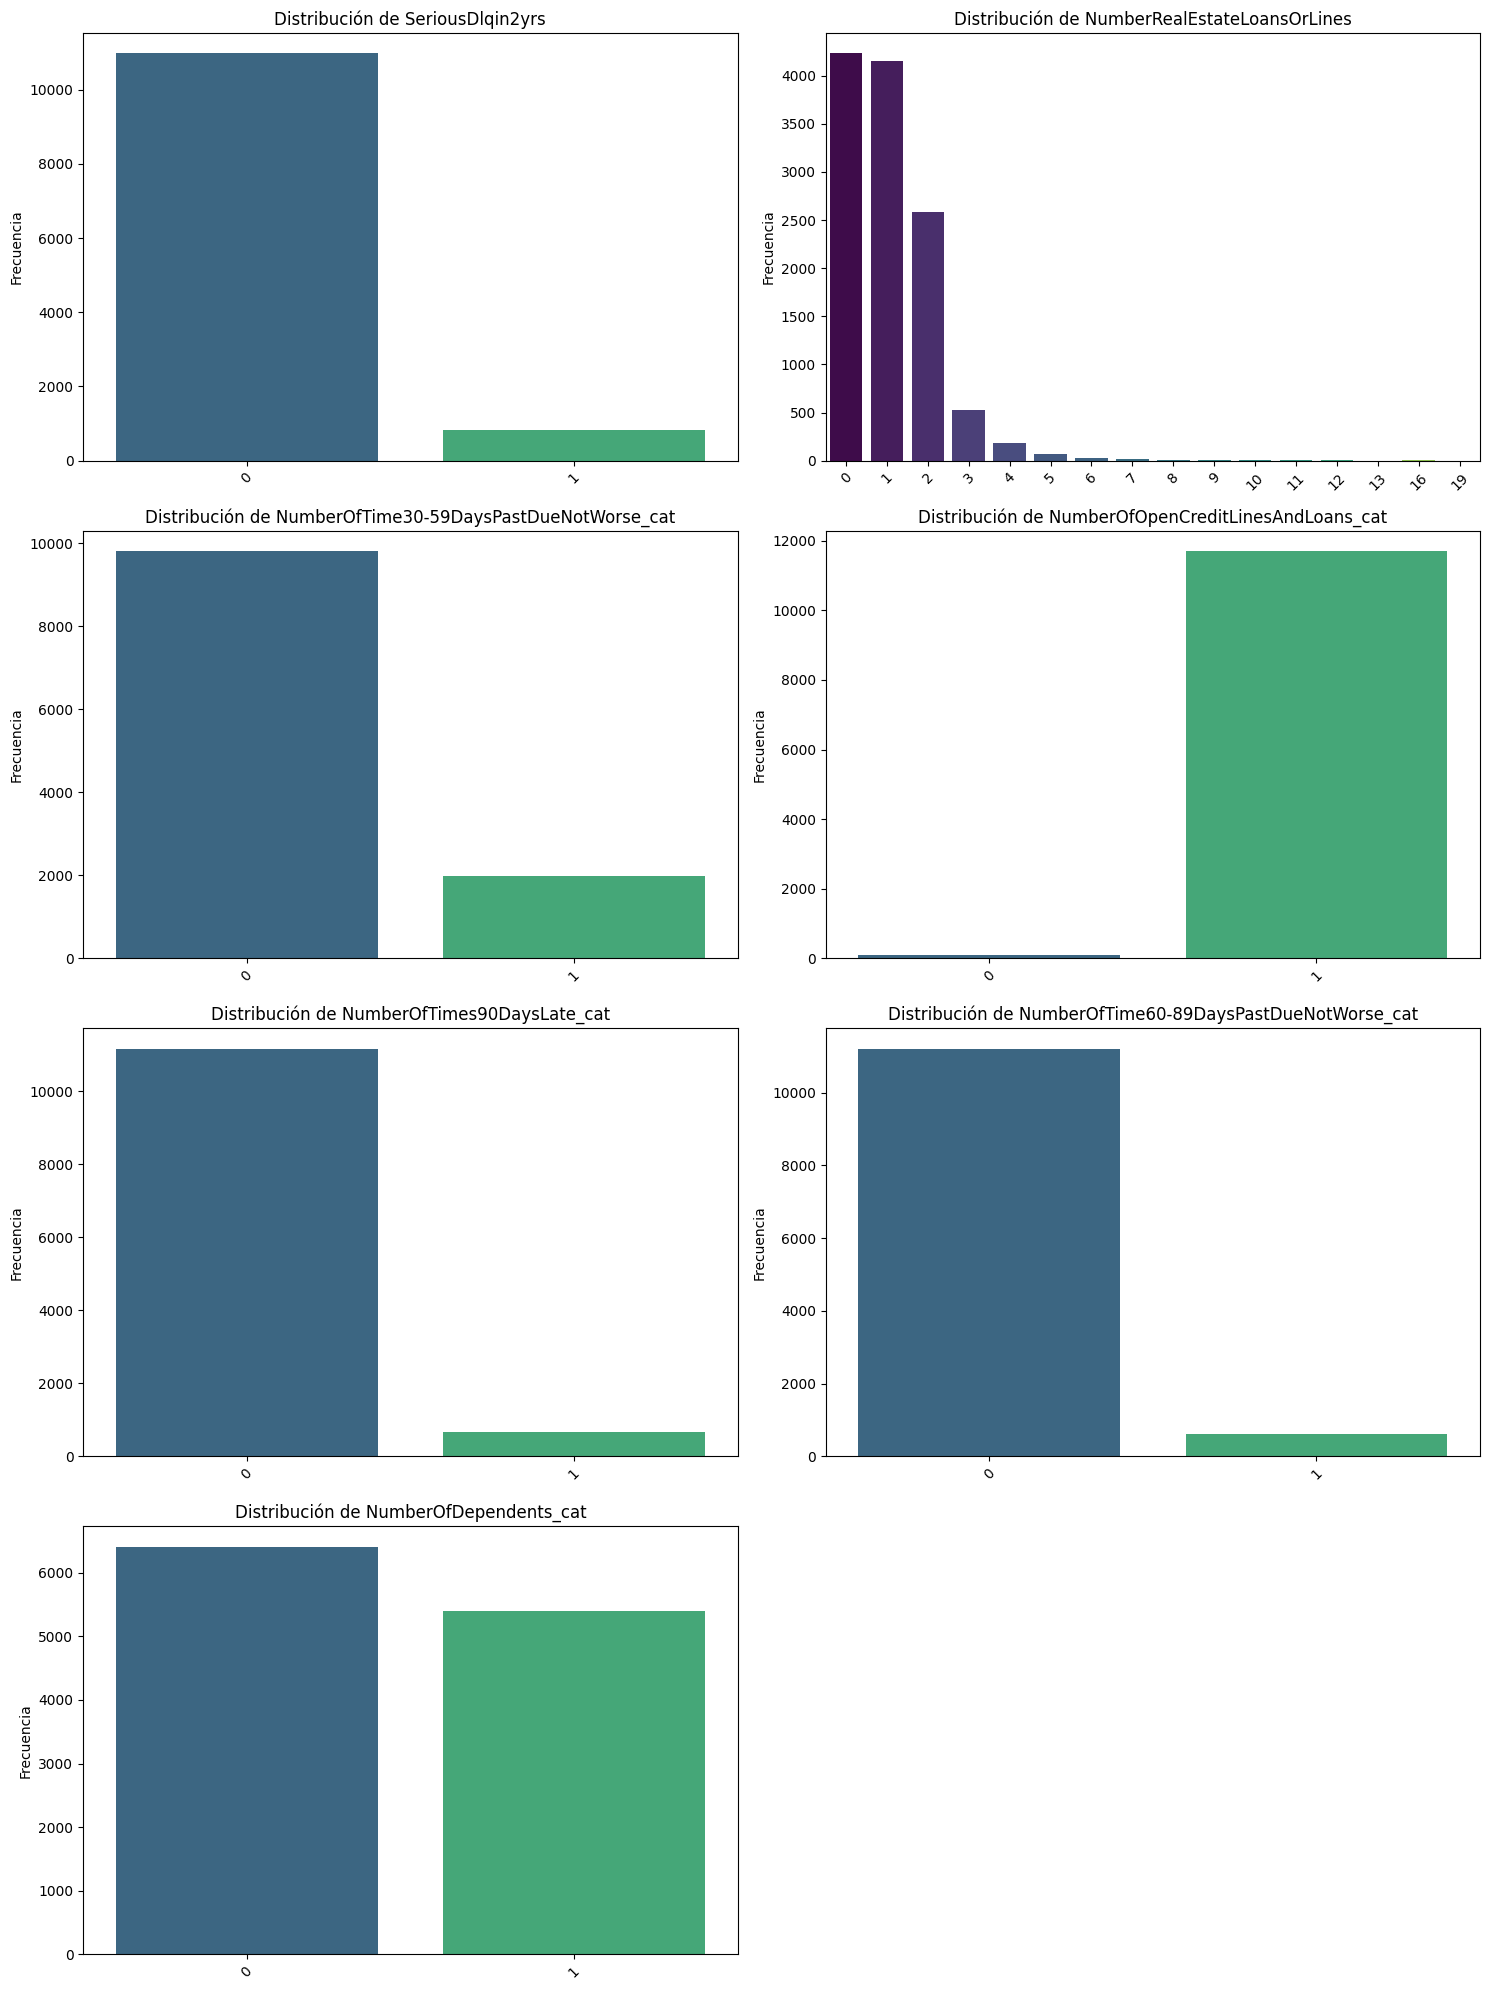

In [158]:
bt.pinta_distribucion_categoricas(df, columnas_categoricas=categoricas)

In [164]:
bt.plot_categorical_numerical_relationship(df, categoricas, numericas, True, "mean")

TypeError: DataFrame.sort_values() missing 1 required positional argument: 'by'


3. Escoge tres modelos y a la hora compararlos para escoger el mejor, entrenalos con validación cruzada empleando las seis listas obtenidas anteriormente. Es decir tendrás 18 (6*3) medidas (emplea la métrica que creas más conveniente y si no se te ocurre ninguna el recall medio).  Escoge el mejor modelo y la mejor selección de features.

4. Optimiza los hiperparámetros del mejor modelo. Evalúalo contra test.


### EXTRA

Aplica la PCA como método de selección, escoge un número de componentes en función de la varianza explicada y crea un dataset con el que entrenar el mismo tipo de modelo ganador de la parte general. Entrenalo y evalúalo contra test, comenta el resultado.